In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load Spotify dataset (assuming it's already downloaded from Kaggle)
# Replace the 'path_to_file' with the path to your CSV file
spotify_data = pd.read_csv('song_db.csv', low_memory=False)

In [3]:
# Explore the dataset
# print(spotify_data.head())
print(spotify_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [4]:
# Checking for null values
print(spotify_data.isnull().sum())

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64


In [5]:
# Dropping rows with missing values (if any)
# spotify_data.dropna(inplace=True)
# spotify_data.fillna(spotify_data.mean(), inplace=True)

In [6]:
# Encoding the 'genre' column (if it's not numerical)
# Assuming 'genre' is the target feature to predict
le = LabelEncoder()
spotify_data['genre'] = le.fit_transform(spotify_data['genre'])
spotify_data['genre']
# genre is 0-14

0         0
1         0
2         0
3         0
4         0
         ..
42300    14
42301    14
42302    14
42303    14
42304    14
Name: genre, Length: 42305, dtype: int64

In [7]:
# Select features related to audio characteristics (modify based on the dataset)
features = ['danceability', 'energy', 'acousticness', 'instrumentalness', 'valence', 
            'tempo', 'loudness', 'speechiness', 'key', 'mode', 'duration_ms']

In [8]:
# X will be our feature set, y is the target ('genre')
X = spotify_data[features]
y = spotify_data['genre']

In [27]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
y_train

6863      1
30452    10
8111      1
36665    13
4428      0
         ..
6265      1
11284     2
38158    13
860       0
15795     4
Name: genre, Length: 33844, dtype: int64

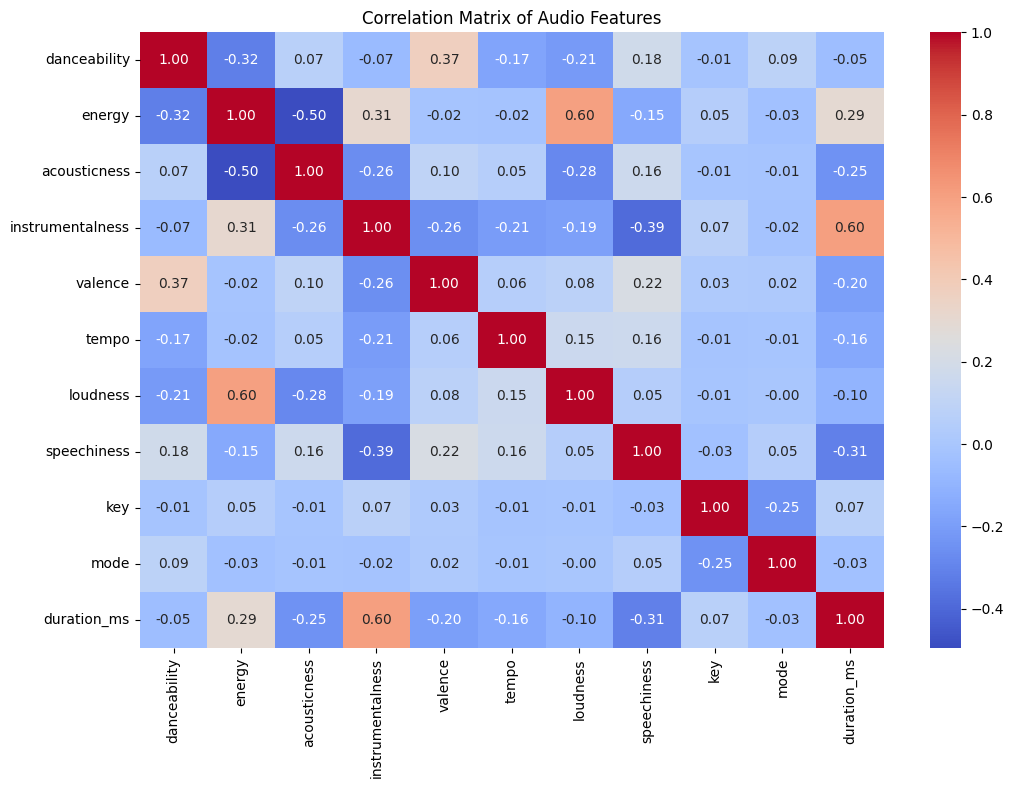

In [24]:
# Feature Correlation Analysis (optional but useful for understanding relationships)
plt.figure(figsize=(12,8))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Audio Features')
plt.show()

In [11]:
# Using Random Forest for Feature Importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

The Random forest or Random Decision Forest is a supervised Machine learning algorithm used for classification, regression,
and other tasks using decision trees. Random Forests are particularly well-suited for handling large and complex datasets,
dealing with high-dimensional feature spaces, and providing insights into feature importance.
This algorithm’s ability to maintain high predictive accuracy while minimizing overfitting makes it a popular choice across various domains,
including finance, healthcare, and image analysis, among others.

In [12]:
# Get feature importances
importances = rf_model.feature_importances_

In [13]:
# Create a dataframe to hold feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

In [15]:
# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
5,tempo,0.234882
10,duration_ms,0.132441
0,danceability,0.102634
3,instrumentalness,0.095336
6,loudness,0.089628
1,energy,0.084627
4,valence,0.075125
7,speechiness,0.073279
2,acousticness,0.071596
8,key,0.030424


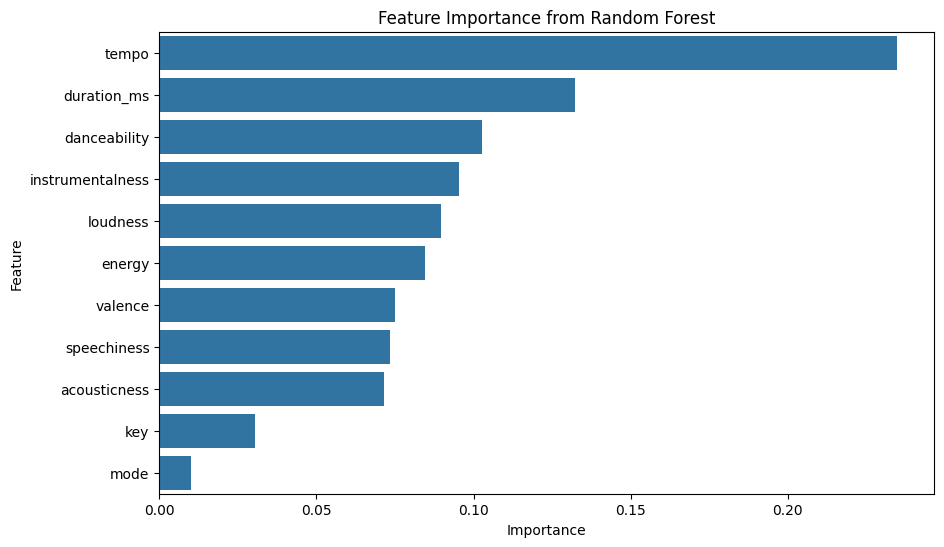

In [16]:
# Plotting feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


In [18]:
# Model Evaluation (optional to check accuracy of model with selected features)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy:.2f}")
y_pred

Random Forest Model Accuracy: 0.67


array([ 7,  0,  1, ..., 10,  7,  1])